In [8]:
from dataloaders import data_set,data_dict
import torch
import yaml
import os
import torch.nn as nn

import torch
import torch.optim as optim

from dataloaders import data_set,data_dict
from models.model_builder import model_builder


import numpy as np

import ray
from ray import tune, air
from ray.air import session, Checkpoint
from ray.tune.examples.mnist_pytorch import ConvNet, get_data_loaders, train, test
from ray.tune.schedulers import PopulationBasedTraining

from functionapi import train_net
from PBTTrainable import RayModel

from analysis import plot_hp_history, get_average_frame, _load_policy
import random

import matplotlib.pyplot as plt
from utils import adjust_learning_rate_class
from ray.tune.schedulers.pb2 import PB2

from pbtexperiment import validation, _get_data

In [ ]:
experiment_path = "/home/janis/PopulationBasedTraining/RayTuneResults/dg/pbt/00"

trainable = RayModel
#trainable = train_net

restored_tuner = tune.Tuner.restore(experiment_path,trainable=trainable)
results_grid = restored_tuner.get_results()
best_result = results_grid.get_best_result(mode="max", metric="mean_accuracy")

best_result.metrics_dataframe
print(best_result._local_path)

get_average_frame(results_grid, "mixup_probability").plot(title="Average Mixup Probability over Time")
get_average_frame(results_grid, "random_augmentation_prob").plot(title="Average Randomaug Probability over Time")


best_result.metrics_dataframe.plot("training_iteration", "mean_accuracy", title="Mean Accuracy of best over time")
best_result.metrics_dataframe.plot("training_iteration", "random_augmentation_prob", title="Random Aug Prop of best over time")
best_result.metrics_dataframe.plot("training_iteration", "mixup_probability", title="Mixup Prop of best over time")


#results_grid[10].metrics_dataframe.plot("training_iteration", "mean_accuracy")
#results_grid[10].metrics_dataframe.plot("training_iteration", "mixup_probability")

plot_hp_history(results_grid, "mixup_probability")
plot_hp_history(results_grid, "random_augmentation_prob")
plot_hp_history(results_grid, "random_aug_first")

#best_result.metrics_dataframe

#best_checkpoint = best_result.checkpoint
#checkpoint_dict = best_checkpoint.to_dict()

Schedule

{'random_augmentation_prob': 1.0, 'mixup_probability': 0.2, 'random_aug_first': 0.4, 'checkpoint_interval': 4}


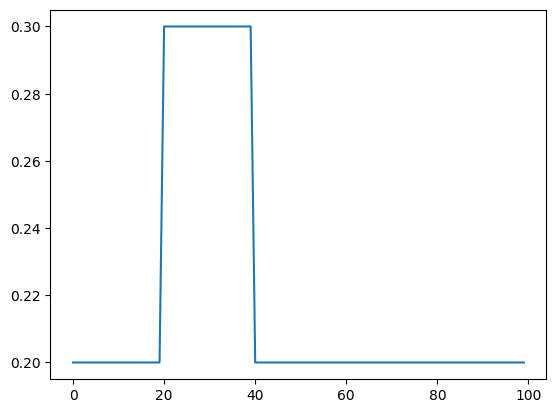

In [41]:
path = "/home/janis/PopulationBasedTraining/RayTuneResults/dg/pbt/run1/results/00/pbt_policy_3810a_00008.txt"
epochs = 100
parameter = "mixup_probability"

config, policy = _load_policy(path)
print(config)
x = []
y = []

for i in range(epochs):
    if (len(policy) > 0):
        it, po = policy[0]
        if i == it:
            policy.pop(0)
            config = po
    
    x.append(i)
    y.append(config[parameter])
    
plt.plot(x, y)
plt.show()




2023-08-21 14:48:22,152	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is periodic.
2023-08-21 14:48:22,201	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is periodic.
2023-08-21 14:48:22,244	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is pe

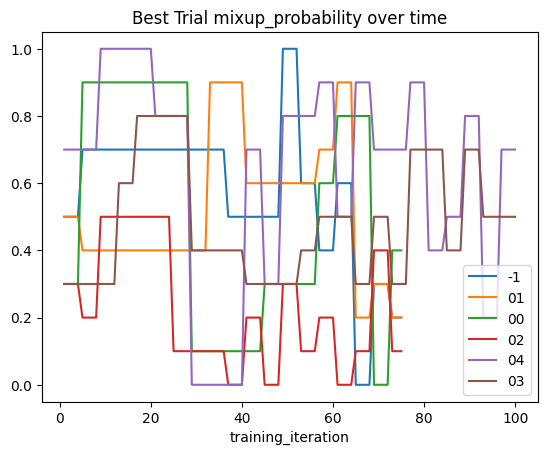

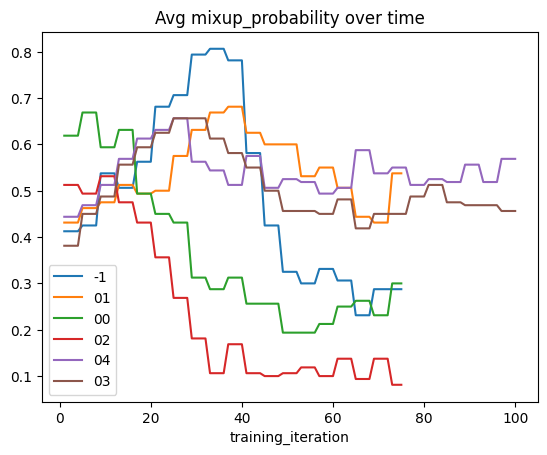

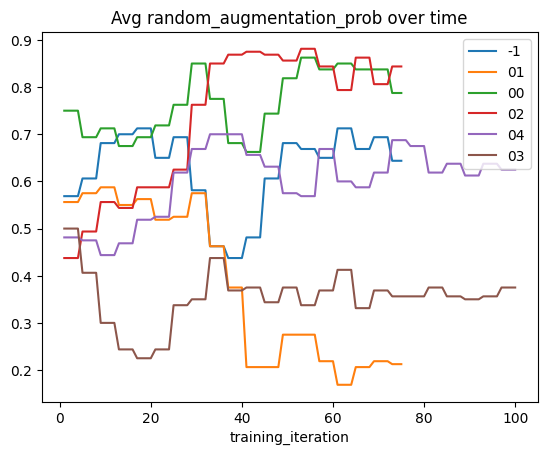

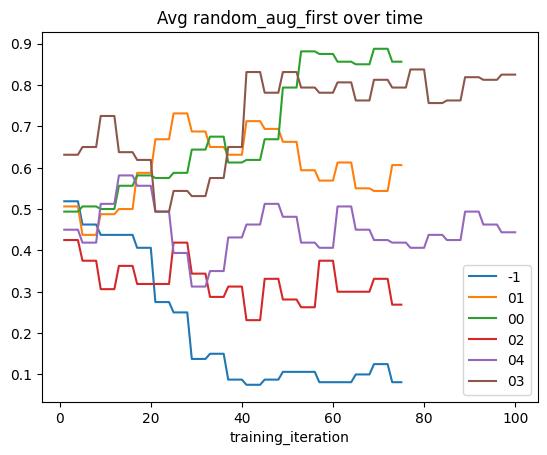

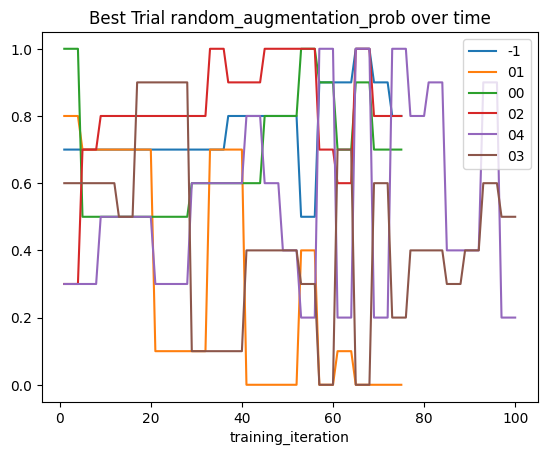

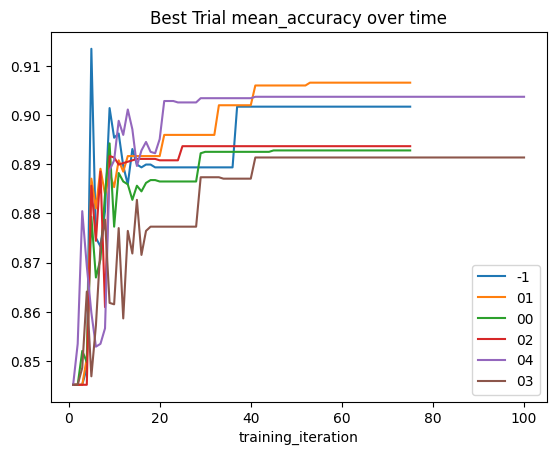

In [38]:
experiment_folder = "/home/janis/PopulationBasedTraining/RayTuneResults/dg/pbt/run1/results"

trainable = RayModel
#trainable = train_net

def compare_experiments(experiment_folder, trial, parameter):
    ax=None
    
    legend = []

    for f in os.listdir(experiment_folder):
        legend.append(f)
        restored_tuner = tune.Tuner.restore(experiment_folder+"/"+f,trainable=RayModel)
        grid = restored_tuner.get_results()
        
        if trial == "avg":
            frame = get_average_frame(grid, parameter)
            ax = frame.plot(ax=ax, title="Avg " + parameter + " over time")
        elif trial == "best":
            frame = grid.get_best_result(mode="max", metric="mean_accuracy").metrics_dataframe[["training_iteration", parameter]]
            ax = frame.plot(ax=ax, x="training_iteration",y=parameter, title="Best Trial " + parameter + " over time")
    
    ax.legend(legend)
    
    

        
compare_experiments(experiment_folder, "best", "mixup_probability")

compare_experiments(experiment_folder, "avg", "mixup_probability")

compare_experiments(experiment_folder, "avg", "random_augmentation_prob")

compare_experiments(experiment_folder, "avg", "random_aug_first")

compare_experiments(experiment_folder, "best", "random_augmentation_prob")

compare_experiments(experiment_folder, "best", "mean_accuracy")


In [ ]:
experiment_folder = "/home/janis/PopulationBasedTraining/RayTuneResults/hapt/pbt"

for f in os.listdir(experiment_folder):
    restored_tuner = tune.Tuner.restore(experiment_folder+"/"+f,trainable=pb.train_net)
    grid = restored_tuner.get_results()
    best = grid.get_best_result(mode="max", metric="mean_accuracy")
    print("Best Trial Mean Accuracy: {}, iterations: {}, mixup Propability: {}, Random Aug Propability: {}".
          format(best.metrics["mean_accuracy"], best.metrics["training_iteration"], 
                 best.metrics["mixup_probability"], best.metrics["random_augmentation_prob"]))

2023-08-14 17:14:35,991	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is periodic.
2023-08-14 17:14:36,020	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is periodic.
2023-08-14 17:14:36,049	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is pe

Best Trial Mean Accuracy: 0.9413184492381959, iterations: 100, mixup Propability: 0.0, Random Aug Propability: 1.0
Best Trial Mean Accuracy: 0.9321164579876301, iterations: 55, mixup Propability: 0.7000000000000001, Random Aug Propability: 0.4
Best Trial Mean Accuracy: 0.921255091265651, iterations: 18, mixup Propability: 0.4, Random Aug Propability: 0.4
Best Trial Mean Accuracy: 0.9413184492381959, iterations: 100, mixup Propability: 0.2, Random Aug Propability: 0.30000000000000004
